# Stock Expected excess return to Conditional Value-At-Risk Chart

In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics

import warnings
warnings.filterwarnings("ignore")

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [2]:
start = '2019-01-01' #input
end = '2020-07-01' #input
symbol = 'AMD' #input

In [3]:
stocks = yf.download(symbol, start=start, end=end)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [4]:
stocks_returns = stocks.pct_change().dropna()
rf = yf.download('BIL', start=start, end=end)['Adj Close'].pct_change()[1:]

[*********************100%***********************]  1 of 1 completed


In [5]:
def ercvar(stock_returns, rf):
    confidence_level = 0.05
    sortedReturns = sorted(stock_returns)
    erCVaR = (1 - statistics.mean(sortedReturns[0:int(len(sortedReturns)*confidence_level)])) * math.sqrt(252/12)
    return erCVaR

Text(0, 0.5, 'Expected excess return to Conditional Value-at-Risk')

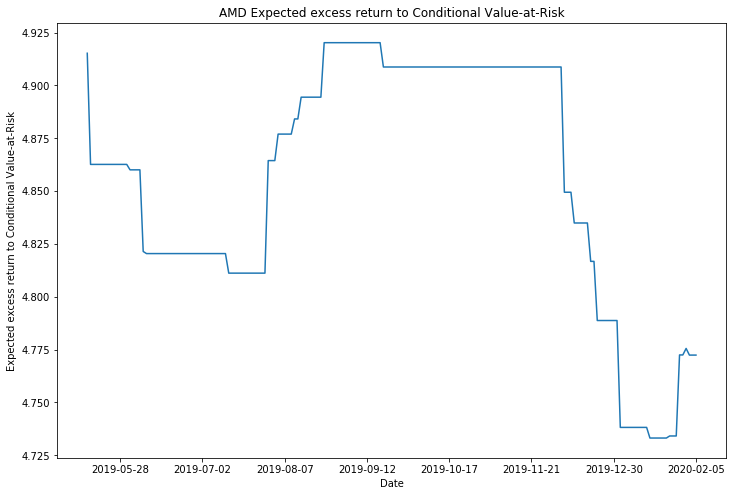

In [6]:
# Compute the running Expected excess return to Conditional Value-at-Risk
running = [ercvar(stocks_returns[i-90:i], rf[i-90:i]) for i in range(90, len(stocks_returns))]

# Plot running Expected excess return to Conditional Value-at-Risk up to 100 days before the end of the data set
_, ax1 = plt.subplots(figsize=(12,8))
ax1.plot(range(90, len(stocks_returns)-100), running[:-100])
ticks = ax1.get_xticks()
ax1.set_xticklabels([stocks.index[int(i)].date() for i in ticks[:-1]]) # Label x-axis with dates
plt.title(symbol + ' Expected excess return to Conditional Value-at-Risk')
plt.xlabel('Date')
plt.ylabel('Expected excess return to Conditional Value-at-Risk')

In [7]:
stock_cvar = ercvar(stocks_returns, rf)
stock_cvar

4.951004414657159

In [8]:

running

[4.915208369816119,
 4.862620789161616,
 4.862620789161616,
 4.862620789161616,
 4.862620789161616,
 4.862620789161616,
 4.862620789161616,
 4.862620789161616,
 4.862620789161616,
 4.862620789161616,
 4.862620789161616,
 4.862620789161616,
 4.862620789161616,
 4.860048986583817,
 4.860048986583817,
 4.860048986583817,
 4.860048986583817,
 4.8214246176920765,
 4.8204283041437295,
 4.8204283041437295,
 4.8204283041437295,
 4.8204283041437295,
 4.8204283041437295,
 4.8204283041437295,
 4.8204283041437295,
 4.8204283041437295,
 4.8204283041437295,
 4.8204283041437295,
 4.8204283041437295,
 4.8204283041437295,
 4.8204283041437295,
 4.8204283041437295,
 4.8204283041437295,
 4.8204283041437295,
 4.8204283041437295,
 4.8204283041437295,
 4.8204283041437295,
 4.8204283041437295,
 4.8204283041437295,
 4.8204283041437295,
 4.8204283041437295,
 4.8204283041437295,
 4.8204283041437295,
 4.811176283524685,
 4.811176283524685,
 4.811176283524685,
 4.811176283524685,
 4.811176283524685,
 4.81117628352